In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import lime
from skimage.segmentation import mark_boundaries
from lime import lime_image
from torchvision import transforms
import cv2
import torch
from torchvision import models
import torch.nn as nn
from keras.preprocessing import image
from keras.applications import inception_v3 as inc_net
from lime import lime_image

In [2]:
transf=transforms.ToTensor()
def get_model(m_path):
    model = models.resnet18(pretrained=True)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 1)

    # Load model parameters
    checkpoint = torch.load(m_path,map_location=torch.device('cpu')) 
    model.load_state_dict(checkpoint)
    
    return model

In [3]:
model_path='C:/Users/ROG/Prediction for Brain Age/cnn.pkl'
model= get_model(model_path) #load model
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img=cv2.imread(img_path)
        size=(196, 160)
        img=cv2.resize(img, size)
        out.append(img)
    return np.array(out)

In [5]:
def pred(images):
    print(images.shape)
    images = torch.from_numpy(images).float()/255
    images = torch.permute(images, [0, 3, 1, 2])
    print((model(images).detach().numpy()-70) / 100)
    return (model(images).detach().numpy()-60)/30

In [6]:
validation_path_brain = 'C:/Users/ROG/Prediction for Brain Age/Kaiyi model test pictures/'
image_paths = []
for _, _, files in os.walk(validation_path_brain):
    for file in files:
        image_paths.append(os.path.join(validation_path_brain, file))
images = transform_img_fn(image_paths) # load images

In [7]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0], pred, top_labels=1, hide_color=0, num_samples=1000) 

(10, 160, 196, 3)
[[0.09832046]
 [0.0921521 ]
 [0.08921013]
 [0.07457413]
 [0.0595433 ]
 [0.0611309 ]
 [0.09108917]
 [0.07233521]
 [0.16767281]
 [0.08478539]]
(10, 160, 196, 3)
[[0.0890979 ]
 [0.08522354]
 [0.0779998 ]
 [0.08983169]
 [0.09697716]
 [0.08247712]
 [0.0696904 ]
 [0.06780556]
 [0.09937805]
 [0.15272216]]
(10, 160, 196, 3)
[[0.09590881]
 [0.08567215]
 [0.0861586 ]
 [0.08113968]
 [0.06703308]
 [0.07278671]
 [0.05889908]
 [0.06257302]
 [0.08492264]
 [0.06714966]]
(10, 160, 196, 3)
[[0.07985412]
 [0.08768448]
 [0.08710785]
 [0.07360718]
 [0.07609139]
 [0.07977501]
 [0.1655114 ]
 [0.09158371]
 [0.06946335]
 [0.07200821]]
(10, 160, 196, 3)
[[0.08346909]
 [0.10771706]
 [0.08716042]
 [0.09145355]
 [0.09576111]
 [0.0845015 ]
 [0.09098038]
 [0.10359528]
 [0.08874641]
 [0.07871437]]
(10, 160, 196, 3)
[[0.0814695 ]
 [0.09505135]
 [0.08726837]
 [0.12155762]
 [0.08951645]
 [0.09518997]
 [0.0926165 ]
 [0.08499664]
 [0.08947418]
 [0.08847908]]
(10, 160, 196, 3)
[[0.06080574]
 [0.09147713]


(10, 160, 196, 3)
[[0.12499145]
 [0.09464928]
 [0.09859947]
 [0.09357727]
 [0.08684906]
 [0.09462158]
 [0.08546158]
 [0.09186905]
 [0.09656914]
 [0.07521545]]
(10, 160, 196, 3)
[[0.10250809]
 [0.06371933]
 [0.09248436]
 [0.07499573]
 [0.07260986]
 [0.09050232]
 [0.05701035]
 [0.07864319]
 [0.07441612]
 [0.09145409]]
(10, 160, 196, 3)
[[0.12217171]
 [0.13259178]
 [0.03706787]
 [0.06543167]
 [0.07237595]
 [0.02012192]
 [0.07945023]
 [0.0758995 ]
 [0.08183067]
 [0.08047829]]
(10, 160, 196, 3)
[[0.06019989]
 [0.08825897]
 [0.06981064]
 [0.05252213]
 [0.03632294]
 [0.0943335 ]
 [0.0930912 ]
 [0.09061401]
 [0.11950867]
 [0.06072685]]
(10, 160, 196, 3)
[[0.08336357]
 [0.0727787 ]
 [0.08403915]
 [0.08902489]
 [0.09113357]
 [0.1005938 ]
 [0.07785873]
 [0.08214203]
 [0.08716095]
 [0.17158608]]
(10, 160, 196, 3)
[[0.06761032]
 [0.04200531]
 [0.08786484]
 [0.09287125]
 [0.0719841 ]
 [0.06959183]
 [0.06172257]
 [0.04994675]
 [0.08670013]
 [0.15228157]]
(10, 160, 196, 3)
[[0.05410866]
 [0.05277313]


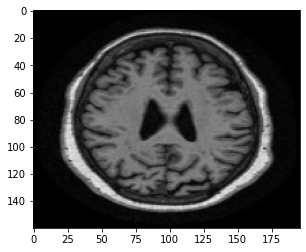

In [8]:
plt.imshow(images[0])

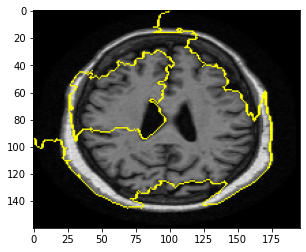

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

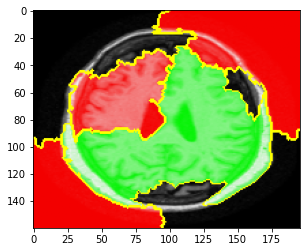

In [10]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

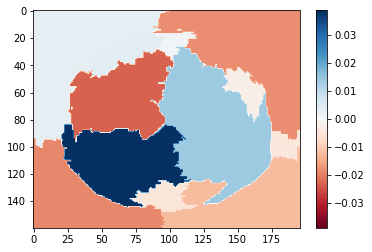

In [11]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [16]:
explanation = explainer.explain_instance(images[1], pred, top_labels=1, hide_color=0, num_samples=1000) 

(10, 160, 196, 3)
[[0.09171387]
 [0.08279862]
 [0.08474945]
 [0.06831291]
 [0.10057663]
 [0.0727491 ]
 [0.09027267]
 [0.11160233]
 [0.07544357]
 [0.0846479 ]]
(10, 160, 196, 3)
[[0.08601104]
 [0.08700035]
 [0.09206131]
 [0.08760231]
 [0.09111473]
 [0.10124192]
 [0.07252441]
 [0.10551132]
 [0.08944756]
 [0.08954216]]
(10, 160, 196, 3)
[[0.10582337]
 [0.08196503]
 [0.07351883]
 [0.07459946]
 [0.08229538]
 [0.08988075]
 [0.1033403 ]
 [0.08771744]
 [0.08267448]
 [0.08914734]]
(10, 160, 196, 3)
[[0.08733551]
 [0.08807861]
 [0.08265869]
 [0.096427  ]
 [0.14024612]
 [0.09849563]
 [0.09009048]
 [0.09099655]
 [0.08835831]
 [0.09505378]]
(10, 160, 196, 3)
[[0.09456894]
 [0.08905434]
 [0.06981476]
 [0.12237396]
 [0.06945999]
 [0.08170471]
 [0.09142692]
 [0.0932447 ]
 [0.07391503]
 [0.07957916]]
(10, 160, 196, 3)
[[0.06960068]
 [0.09123482]
 [0.08619278]
 [0.08735763]
 [0.0927404 ]
 [0.08047561]
 [0.10096405]
 [0.06451324]
 [0.07864884]
 [0.08842049]]
(10, 160, 196, 3)
[[0.05436157]
 [0.05668785]


(10, 160, 196, 3)
[[0.0926123 ]
 [0.06821533]
 [0.07558624]
 [0.06495361]
 [0.09577125]
 [0.0601474 ]
 [0.07854546]
 [0.07222885]
 [0.07933746]
 [0.10171822]]
(10, 160, 196, 3)
[[0.08105438]
 [0.09139488]
 [0.09389366]
 [0.05466492]
 [0.06890488]
 [0.08441506]
 [0.05961121]
 [0.08595818]
 [0.06639519]
 [0.0829715 ]]
(10, 160, 196, 3)
[[0.08437821]
 [0.09761673]
 [0.08918358]
 [0.09042229]
 [0.09291916]
 [0.09919968]
 [0.07311226]
 [0.11073715]
 [0.09100815]
 [0.10916931]]
(10, 160, 196, 3)
[[0.09930801]
 [0.10083015]
 [0.09830444]
 [0.10144974]
 [0.09829354]
 [0.09694587]
 [0.1003041 ]
 [0.10563111]
 [0.09879807]
 [0.1083715 ]]
(10, 160, 196, 3)
[[0.08072891]
 [0.07782936]
 [0.05349426]
 [0.06307007]
 [0.09242096]
 [0.09197067]
 [0.08108398]
 [0.09113014]
 [0.07428291]
 [0.09819344]]
(10, 160, 196, 3)
[[0.07250503]
 [0.07640923]
 [0.0617717 ]
 [0.08977905]
 [0.07994705]
 [0.08544815]
 [0.07027946]
 [0.07975494]
 [0.0884687 ]
 [0.10828651]]
(10, 160, 196, 3)
[[0.08290878]
 [0.07488571]


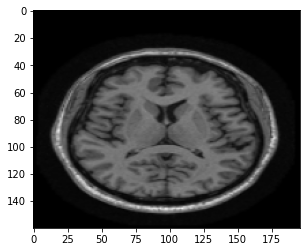

In [17]:
plt.imshow(images[1])

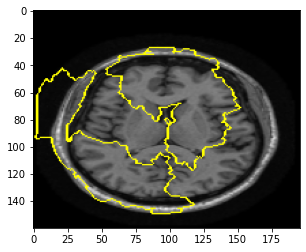

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

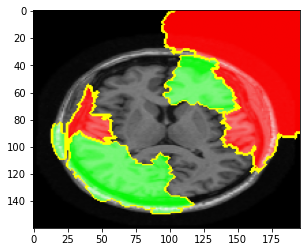

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

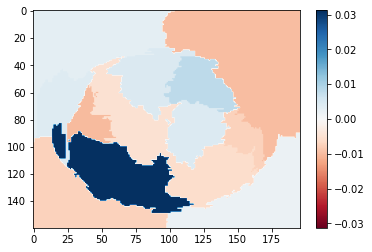

In [20]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [21]:
explanation = explainer.explain_instance(images[2], pred, top_labels=1, hide_color=0, num_samples=1000) 

(10, 160, 196, 3)
[[0.10464447]
 [0.06122315]
 [0.08390091]
 [0.11865982]
 [0.04198219]
 [0.0945372 ]
 [0.10307182]
 [0.06554321]
 [0.04787987]
 [0.08202301]]
(10, 160, 196, 3)
[[0.03788162]
 [0.04554047]
 [0.08006432]
 [0.09368362]
 [0.08965698]
 [0.0889093 ]
 [0.09442665]
 [0.07905807]
 [0.0939486 ]
 [0.08279068]]
(10, 160, 196, 3)
[[0.08910415]
 [0.07056884]
 [0.10312805]
 [0.11063133]
 [0.05947876]
 [0.087388  ]
 [0.09107262]
 [0.10112   ]
 [0.0898143 ]
 [0.0799501 ]]
(10, 160, 196, 3)
[[0.05037628]
 [0.03536835]
 [0.05550842]
 [0.09983192]
 [0.07204033]
 [0.09906624]
 [0.08833801]
 [0.09998108]
 [0.12551528]
 [0.07126556]]
(10, 160, 196, 3)
[[0.09119003]
 [0.09050476]
 [0.08909523]
 [0.05489365]
 [0.09873322]
 [0.08886856]
 [0.09882355]
 [0.04983689]
 [0.03276375]
 [0.14347062]]
(10, 160, 196, 3)
[[0.10242104]
 [0.05569664]
 [0.11565971]
 [0.09563942]
 [0.04869064]
 [0.05524971]
 [0.07855896]
 [0.14169663]
 [0.08536339]
 [0.09184654]]
(10, 160, 196, 3)
[[0.09137329]
 [0.10212738]


 [0.12500083]]
(10, 160, 196, 3)
[[0.09380135]
 [0.06947464]
 [0.09780479]
 [0.09134278]
 [0.06038414]
 [0.11304825]
 [0.0318718 ]
 [0.09826736]
 [0.05978562]
 [0.09965805]]
(10, 160, 196, 3)
[[0.09643623]
 [0.14114013]
 [0.05579849]
 [0.05270599]
 [0.06100517]
 [0.05697761]
 [0.08734726]
 [0.0802034 ]
 [0.09191971]
 [0.08447593]]
(10, 160, 196, 3)
[[0.12071946]
 [0.08754928]
 [0.06335617]
 [0.08778854]
 [0.04147591]
 [0.09819648]
 [0.04375397]
 [0.10274468]
 [0.04138939]
 [0.09180199]]
(10, 160, 196, 3)
[[0.10039909]
 [0.03751114]
 [0.05873283]
 [0.05935325]
 [0.09536041]
 [0.06107399]
 [0.04331817]
 [0.10161148]
 [0.09281105]
 [0.03925789]]
(10, 160, 196, 3)
[[0.10220268]
 [0.07176284]
 [0.05088127]
 [0.07188156]
 [0.08222313]
 [0.07973778]
 [0.11484619]
 [0.0962365 ]
 [0.05324287]
 [0.0649781 ]]
(10, 160, 196, 3)
[[0.08456406]
 [0.08862641]
 [0.09375259]
 [0.08861076]
 [0.06275841]
 [0.09466202]
 [0.08692688]
 [0.10867195]
 [0.10176178]
 [0.09564445]]
(10, 160, 196, 3)
[[0.07755546]

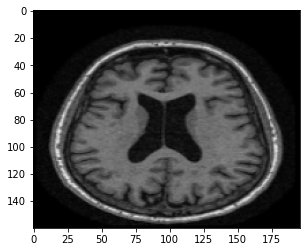

In [22]:
plt.imshow(images[2])

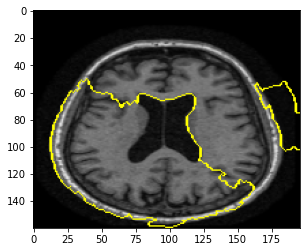

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

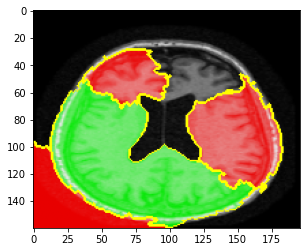

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

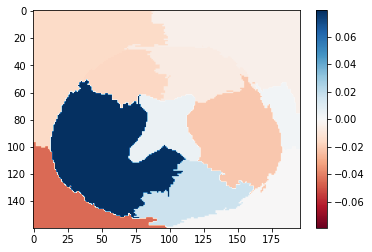

In [25]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [30]:
explanation = explainer.explain_instance(images[3], pred, top_labels=1, hide_color=0, num_samples=1000) 

(10, 160, 196, 3)
[[0.10729294]
 [0.10280655]
 [0.08079941]
 [0.077481  ]
 [0.10133018]
 [0.09132225]
 [0.10404175]
 [0.1003157 ]
 [0.08909416]
 [0.08000091]]
(10, 160, 196, 3)
[[0.11690109]
 [0.11019638]
 [0.08442161]
 [0.08729775]
 [0.08296479]
 [0.10415711]
 [0.07596901]
 [0.07251808]
 [0.07596146]
 [0.07772484]]
(10, 160, 196, 3)
[[0.09142258]
 [0.09909698]
 [0.08541527]
 [0.09127808]
 [0.09292847]
 [0.09175225]
 [0.09835716]
 [0.09234741]
 [0.09807259]
 [0.08522522]]
(10, 160, 196, 3)
[[0.09122505]
 [0.06940689]
 [0.09327957]
 [0.09461457]
 [0.07331497]
 [0.09478195]
 [0.07861702]
 [0.13257599]
 [0.09575149]
 [0.06402664]]
(10, 160, 196, 3)
[[0.06748779]
 [0.09253769]
 [0.09631432]
 [0.09528763]
 [0.08239067]
 [0.0814463 ]
 [0.11319832]
 [0.0957737 ]
 [0.08891922]
 [0.0797525 ]]
(10, 160, 196, 3)
[[0.04521736]
 [0.11021461]
 [0.07145813]
 [0.02447022]
 [0.1335022 ]
 [0.1426889 ]
 [0.07085221]
 [0.06902657]
 [0.04008095]
 [0.03113792]]
(10, 160, 196, 3)
[[0.071334  ]
 [0.04705383]


(10, 160, 196, 3)
[[0.07997887]
 [0.09404144]
 [0.06552139]
 [0.06590042]
 [0.06088425]
 [0.08059341]
 [0.10259903]
 [0.08641022]
 [0.1074163 ]
 [0.10720421]]
(10, 160, 196, 3)
[[0.08377052]
 [0.09610847]
 [0.09449272]
 [0.10586861]
 [0.10292145]
 [0.09694626]
 [0.10444587]
 [0.07764404]
 [0.09017906]
 [0.08546059]]
(10, 160, 196, 3)
[[0.09465072]
 [0.09178635]
 [0.08759384]
 [0.06851692]
 [0.09158523]
 [0.09606095]
 [0.09099052]
 [0.09527206]
 [0.08879471]
 [0.07347656]]
(10, 160, 196, 3)
[[0.08931946]
 [0.08697052]
 [0.08693718]
 [0.07433838]
 [0.07879784]
 [0.06899963]
 [0.07996795]
 [0.09451233]
 [0.06902542]
 [0.11503052]]
(10, 160, 196, 3)
[[0.06673981]
 [0.08989441]
 [0.0766172 ]
 [0.09534645]
 [0.09618721]
 [0.1005156 ]
 [0.07252777]
 [0.09648117]
 [0.08333122]
 [0.0986705 ]]
(10, 160, 196, 3)
[[0.09361061]
 [0.09720558]
 [0.09421875]
 [0.11818992]
 [0.09752045]
 [0.08991425]
 [0.08820923]
 [0.09202896]
 [0.07361496]
 [0.08732353]]
(10, 160, 196, 3)
[[0.09488548]
 [0.08001824]


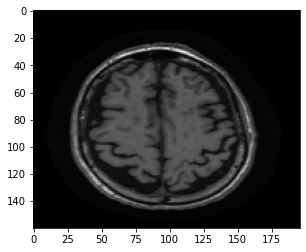

In [31]:
plt.imshow(images[3])

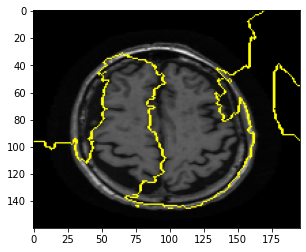

In [32]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

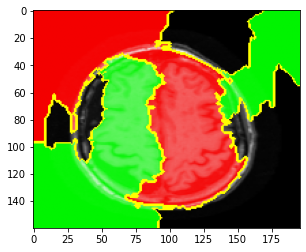

In [33]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

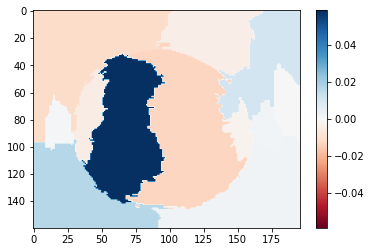

In [34]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [35]:
explanation = explainer.explain_instance(images[4], pred, top_labels=1, hide_color=0, num_samples=1000) 

(10, 160, 196, 3)
[[0.09666328]
 [0.07143082]
 [0.10301842]
 [0.08875336]
 [0.10832489]
 [0.10469696]
 [0.07605369]
 [0.08478111]
 [0.10701317]
 [0.07034615]]
(10, 160, 196, 3)
[[0.09772949]
 [0.10324295]
 [0.08417702]
 [0.07339294]
 [0.09474976]
 [0.09105362]
 [0.0915728 ]
 [0.13702255]
 [0.09137131]
 [0.088489  ]]
(10, 160, 196, 3)
[[0.10882279]
 [0.1008374 ]
 [0.10306679]
 [0.08033508]
 [0.08577438]
 [0.06384102]
 [0.09085464]
 [0.08792053]
 [0.08654289]
 [0.08911461]]
(10, 160, 196, 3)
[[0.09364456]
 [0.09427711]
 [0.08034004]
 [0.07379539]
 [0.09102219]
 [0.0944397 ]
 [0.06980804]
 [0.12241562]
 [0.07851906]
 [0.07773025]]
(10, 160, 196, 3)
[[0.10030541]
 [0.1072345 ]
 [0.09742592]
 [0.10193817]
 [0.09764114]
 [0.10836533]
 [0.0938739 ]
 [0.07997978]
 [0.09596901]
 [0.10902428]]
(10, 160, 196, 3)
[[0.1032399 ]
 [0.09862342]
 [0.09781532]
 [0.08789597]
 [0.08574219]
 [0.08121658]
 [0.09307244]
 [0.0616716 ]
 [0.08670822]
 [0.10034126]]
(10, 160, 196, 3)
[[0.06974426]
 [0.08627075]


 [0.07493706]]
(10, 160, 196, 3)
[[0.11030868]
 [0.10161164]
 [0.10523903]
 [0.09597412]
 [0.08903595]
 [0.06790024]
 [0.07178429]
 [0.09584595]
 [0.09161514]
 [0.08217247]]
(10, 160, 196, 3)
[[0.10633057]
 [0.09199554]
 [0.07982178]
 [0.11734345]
 [0.0767559 ]
 [0.09866089]
 [0.08635849]
 [0.07930374]
 [0.07804977]
 [0.09219132]]
(10, 160, 196, 3)
[[0.08435135]
 [0.10293473]
 [0.10153473]
 [0.10229538]
 [0.09860794]
 [0.0898024 ]
 [0.09549629]
 [0.10725266]
 [0.08585846]
 [0.09085564]]
(10, 160, 196, 3)
[[0.11448158]
 [0.09003929]
 [0.09904854]
 [0.08081001]
 [0.07717194]
 [0.08713165]
 [0.0729213 ]
 [0.09026268]
 [0.0894812 ]
 [0.08393005]]
(10, 160, 196, 3)
[[0.1124791 ]
 [0.08384705]
 [0.08774933]
 [0.09574615]
 [0.08472809]
 [0.09418274]
 [0.08929116]
 [0.07513192]
 [0.1049704 ]
 [0.07370369]]
(10, 160, 196, 3)
[[0.07735123]
 [0.08710922]
 [0.08384033]
 [0.06480393]
 [0.05578385]
 [0.07304046]
 [0.08220718]
 [0.12901428]
 [0.09189629]
 [0.08978523]]
(10, 160, 196, 3)
[[0.07920074]

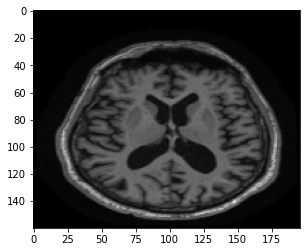

In [36]:
plt.imshow(images[4])

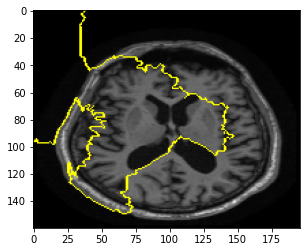

In [37]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

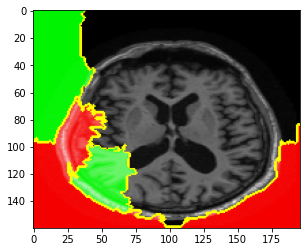

In [38]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

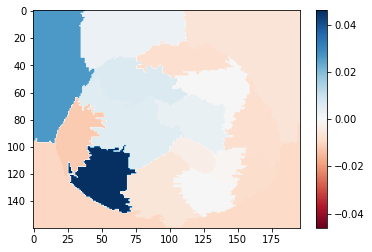

In [39]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [40]:
explanation = explainer.explain_instance(images[5], pred, top_labels=1, hide_color=0, num_samples=1000) 

(10, 160, 196, 3)
[[0.09963379]
 [0.09538696]
 [0.07292648]
 [0.10786026]
 [0.09144387]
 [0.05351792]
 [0.08959366]
 [0.08560013]
 [0.09239945]
 [0.08898285]]
(10, 160, 196, 3)
[[0.08522201]
 [0.09191628]
 [0.07605392]
 [0.07327988]
 [0.10551552]
 [0.09349769]
 [0.10267524]
 [0.10371803]
 [0.1071621 ]
 [0.10264564]]
(10, 160, 196, 3)
[[0.08755524]
 [0.07917053]
 [0.11924598]
 [0.08062027]
 [0.09408524]
 [0.10049072]
 [0.08373673]
 [0.12126885]
 [0.08408973]
 [0.09868866]]
(10, 160, 196, 3)
[[0.09055267]
 [0.09181915]
 [0.08035728]
 [0.09681991]
 [0.06263107]
 [0.13606834]
 [0.09305832]
 [0.07025795]
 [0.07066513]
 [0.14835922]]
(10, 160, 196, 3)
[[0.09115151]
 [0.07701401]
 [0.09498535]
 [0.14760178]
 [0.08789612]
 [0.08847412]
 [0.08402985]
 [0.06992172]
 [0.1270794 ]
 [0.08541878]]
(10, 160, 196, 3)
[[0.07737465]
 [0.10564423]
 [0.12417198]
 [0.09444992]
 [0.0752243 ]
 [0.09153946]
 [0.1020298 ]
 [0.11005402]
 [0.0916182 ]
 [0.07904076]]
(10, 160, 196, 3)
[[0.08816834]
 [0.08037148]


 [0.08008507]]
(10, 160, 196, 3)
[[0.09217804]
 [0.07212349]
 [0.09064804]
 [0.09265358]
 [0.08886123]
 [0.08867539]
 [0.08870682]
 [0.09184647]
 [0.11690185]
 [0.09146462]]
(10, 160, 196, 3)
[[0.11762375]
 [0.08122871]
 [0.07487213]
 [0.09775757]
 [0.05877083]
 [0.07002945]
 [0.09075722]
 [0.09878716]
 [0.06198143]
 [0.07174096]]
(10, 160, 196, 3)
[[0.09251701]
 [0.08666733]
 [0.04927246]
 [0.07116532]
 [0.08634155]
 [0.08582932]
 [0.09946091]
 [0.08283867]
 [0.08095466]
 [0.08257889]]
(10, 160, 196, 3)
[[0.08154251]
 [0.07518081]
 [0.08842743]
 [0.10814422]
 [0.09331467]
 [0.09674858]
 [0.08881988]
 [0.0935376 ]
 [0.08336326]
 [0.0961628 ]]
(10, 160, 196, 3)
[[0.10359314]
 [0.09398239]
 [0.0772512 ]
 [0.1003183 ]
 [0.09538437]
 [0.07006805]
 [0.0850795 ]
 [0.0837912 ]
 [0.06858253]
 [0.11618019]]
(10, 160, 196, 3)
[[0.06341797]
 [0.09523216]
 [0.07018127]
 [0.08777443]
 [0.04766602]
 [0.09591232]
 [0.05671875]
 [0.09600288]
 [0.09660233]
 [0.09371369]]
(10, 160, 196, 3)
[[0.03930557]

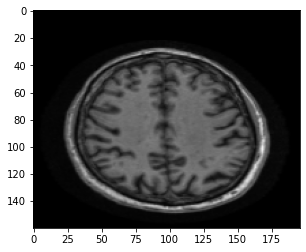

In [41]:
plt.imshow(images[5])

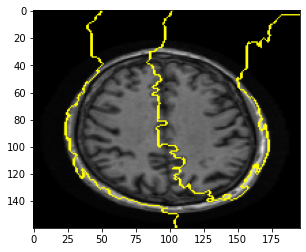

In [42]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

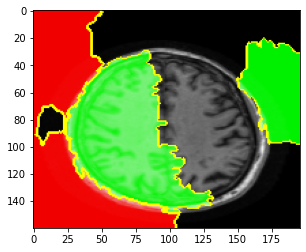

In [43]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

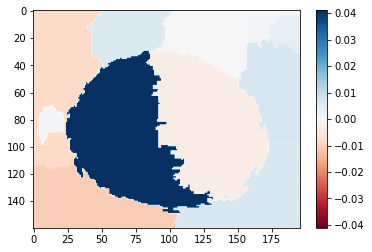

In [44]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()